# Méthode SVM : Support Vector Machines
Dans cette partie on va utiliser l'algorithme SVM pour prédire les 3 classes, puis on évaluera ses performances avec la matrice de méthode de validation croisée, la matrice de confusion et aussi la courbe ROC.

In [299]:
#Içi on importe les bibliothèques qu'on aura besoin par la suite
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [303]:
# on importe le dataset
dataset = pd.read_csv("Grisoni_et_al_2016_EnvInt88.csv")
# on divise le dataset en deux ensemble , un pour l'entrainement et l'autre pour le test selon un ration 75:25
train = dataset[dataset.Set =="Train"]
test = dataset[dataset.Set =="Test"]
# les features x et les labels y pour l'ensemble d'entrainement.
x_train = train[[ "nHM","ON1V","X2Av","PCD","piPC09","MLOGP","N-072","B02[C-N]","F04[C-O]","logBCF"]]
y_train = train[["Class"]]
# de meme pour l'ensemble de test.
x_test = test[[ "nHM","ON1V","X2Av","PCD","piPC09","MLOGP","N-072","B02[C-N]","F04[C-O]","logBCF"]]
y_test = test[["Class"]]

test.shape ## on affiche le nombre de tuples de test avec le nombre de variables

(195, 14)

In [314]:
#On utilise la méthode GridSerachCV pour parcourir l'ensemble de valeurs de l'hyperparamètre et produit celui qui 
# donne un trés bon score.
from sklearn.model_selection import GridSearchCV

parameter_candidates = [ ## on choisit l'ensemble des hyperparamètres qu'on va tester
  {'C': [1, 10, 100,13, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(x_train, y_train)   
print('Best score for data1:', clf.best_score_) 
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best score for data1: 0.7449307397583259
Best C: 1000
Best Kernel: rbf
Best Gamma: 0.001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [298]:
#Içi une deuxième méthode en utilisant la méthode de validation croisée pour chaque valeur de K et à la fin on choisit 
# l'hyperparamètre K qui a la plus bonne précision.
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

X = dataset[["nHM","ON1V","X2Av","PCD","piPC09","MLOGP","N-072","B02[C-N]","F04[C-O]","logBCF"]]
y = dataset[["Class"]]

scores = [] # liste dans laquelle on stocke le score de validation de chaque fold.
for C in range (3,15):
    classifier = SVC(C)
    score_validation = cross_val_score(classifier, X, y, cv=5).mean() # parmi l'ensemble des scores renvoyer on fait le mean
    scores.append((score_validation,C))  # et on le stocke dans la liste
    
scores #on affiche le score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass C=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  retur

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[(0.7355831265508685, 3),
 (0.7394375516956162, 4),
 (0.7420181968569066, 5),
 (0.7407361455748553, 6),
 (0.7445740281224152, 7),
 (0.7458560794044665, 8),
 (0.7497105045492143, 9),
 (0.7522911497105046, 10),
 (0.749727047146402, 11),
 (0.7561538461538462, 12),
 (0.7587179487179487, 13),
 (0.7574358974358975, 14)]

In [311]:
# Ici on calcule la précision de notre algorithme sur des nouvelles données (y_test)
poly = svm.SVC(C=1000,kernel="rbf",gamma=1/1000).fit(x_train, y_train) # on prend C, kernel et gamma qui donnent
#la plus forte précision daprès GridSearchCV précedent et on entraine le modèle.
y_pred = poly.predict(x_test) # on évalue le modèle sur les données de test
poly_accuracy = accuracy_score(y_test,y_pred ) # on calcule le score
poly_accuracy # on affiche le score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7538461538461538

In [313]:
#Içi on calcule la matrice de confusion ainsi les reports de classification
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[100   1  14]
 [  9   5   2]
 [ 22   0  42]]
              precision    recall  f1-score   support

           1       0.76      0.87      0.81       115
           2       0.83      0.31      0.45        16
           3       0.72      0.66      0.69        64

    accuracy                           0.75       195
   macro avg       0.77      0.61      0.65       195
weighted avg       0.76      0.75      0.74       195



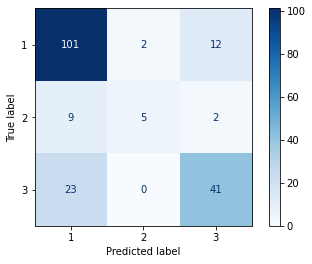

In [297]:
#deuxième façon pour calculer la matrice de confusion avec un nouveau format en utilisant la bibliothèque sklearn
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(poly, x_test, y_test,
                                 display_labels=[1,2,3],
                                 cmap=plt.cm.Blues)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


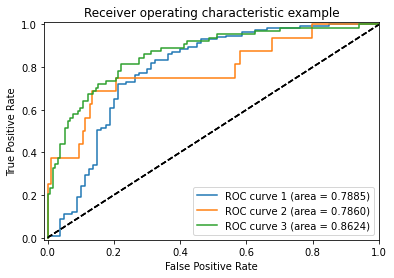

In [319]:
# Courbe ROC : True positive rate et False positive rate
from sklearn.metrics import roc_auc_score,roc_curve,auc
classes = [1, 2, 3]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
        classe = classes[i] 
        y_test_classe = (y_test == classe)
        classifier.fit(x_train,y_train)
        stat=classifier.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test_classe, stat[:,i])

        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve %s (area = %0.4f)' %(classe, roc_auc))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-0.01, 1.0])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
plt.show()